**Obrada informacija**: Prva laboratorijska vježba

Rijeke imaju veliki gospodarski značaj, od termoelektrana i nuklearnih elektrana kojima su rijeke nužne za rad, javne vodoopskrbe do poljoprivrede i transporta. Premda ljudi danas uvelike upravljaju vodotocima, uslijed vremenskih prilika ipak može doći do poplava, erozija tla i sličnih prirodnih nepogoda. Kako bismo se mogli na vrijeme pripremiti za potencijalne probleme, potrebno je istražiti ponašanje rijeka na temelju višegodišnjih praćenja vodostaja. U ovoj laboratorijskoj vježbi ćete analizirati vodostaje rijeke Save kroz period od 25 godina.

Unutar komprimiranog direktorija u kojem se nalazi ova bilježnica, nalazi se i .mat datoteka s podacima o vodostaju rijeke Save u periodu od 1.1.1982. do 31.12.2007. Svaki podatak označava jedan dan mjerenja vodostaja.

Vježba se izvodi u Pythonu/Google Colabu, a sve naredbe potrebne za provedbu vježbe te njihova objašnjenja dana su u predavanju. Ova laboratorijska vježba nosi 3 boda.

Kad ste gotovi s vježbom, na *Moodle* postavite .pdf izvješće s vježbe (.pdf izvješće možete generirati s naredbom File-Print-Location: PDF).

**1.**	Učitajte biblioteke: NumPy, matplotlib.pyplot, scipy.fft, signal iz scipy te pywt.

In [1]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal
import pywt

**2.**	Učitajte podatke o vodostaju iz .mat datoteke koja se nalazi unutar istog komprimiranog direktorija. Učitani podaci su spremljeni u rječnik. Izdvojite ključ i pripadne podatke o vodostajima te po potrebi smanjite dimenziju.

Savjet: .mat datoteku učitajte sa svog Google Drivea (unutar mape Colab Notebooks na svom Google Driveu postavite .mat datoteku). Ostali savjeti nalaze se u sljedećem programskom odsječku.

In [2]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

from google.colab import drive
drive.mount('/content/drive')

# Nakon što pokrenete ovaj odsječak koda, pojavit će se link u prozoru ispod. Kliknite na link, prijavite se sa svojim Google računom te ćete
# dobiti kod koji trebate kopirati u izlaz ispod ovog prozora (u prozor "Enter your authorization code: "). Nakon što upišete dobiveni kod,
# pojavit će se poruka "Mounted at /content/drive".
# Ako unutar takvog Colab Notebook direktorija imate spremljenu datoteku "OIkobas.mat", možete joj pristupiti sljedećim liniijama koda:
from scipy import io
kobas_iz_matlaba=io.loadmat("drive/My Drive/Colab Notebooks/OIkobas.mat")
print(kobas_iz_matlaba)
# izdvajanje jednog kljuca i pripadne vrijednosti iz kljuca
values = kobas_iz_matlaba['kobas']

# smanjivanje dimenzije liste values
values = np.squeeze(values)

Mounted at /content/drive
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sat Oct 10 13:46:29 2020', '__version__': '1.0', '__globals__': [], 'kobas': array([[661],
       [674],
       [685],
       ...,
       [242],
       [230],
       [228]], dtype=uint16)}


**3.**	Ispišite: broj dana za koje postoje podaci o vodostajima, srednju vrijednost vodostaja, standardnu devijaciju, minimalnu vrijednost, maksimalnu vrijednost te median.

In [3]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

# stvaranje liste vremena od 0 do values.size - 1 uz korak = 1
n = np.arange(0, values.size, 1)

print(f"Broj dana za koje postoje podaci o vodostajima: {n.size}") # broj dana za koje postoje podaci o vodostajima
print(f"Srednja vrijednost vodostaja: {np.mean(values)}") # srednja vrijednost vodostaja
print(f"Standardna devijacija: {np.std(values)}") # standardna devijacija
print(f"Minimalna vrijednost vodostaja: {np.min(values)}") # minimalna vrijednost
print(f"Maksimalna vrijednost vodostaja: {np.max(values)}") # maksimalna vrijednost
print(f"Medijan: {np.median(values)}") # medijan

Broj dana za koje postoje podaci o vodostajima: 9496
Srednja vrijednost vodostaja: 294.25758213984835
Standardna devijacija: 183.09167165945507
Minimalna vrijednost vodostaja: 17
Maksimalna vrijednost vodostaja: 878
Medijan: 255.0


**4.** Nacrtajte vodostaj. Obilježite x i y os te naslov slike.

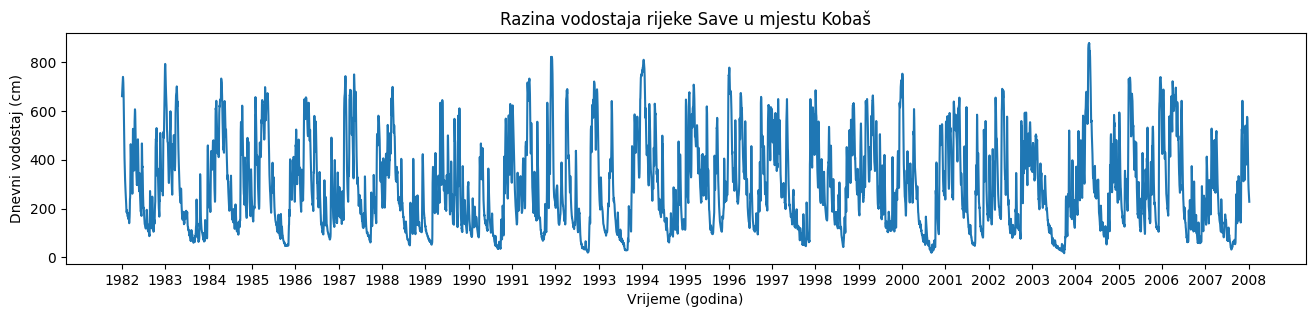

In [4]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
plt.figure(figsize=(16, 3))
plt.plot(n, values)

plt.title('Razina vodostaja rijeke Save u mjestu Kobaš')

plt.xlabel('Vrijeme (godina)')
plt.ylabel('Dnevni vodostaj (cm)')
plt.xticks(np.arange(0, n.size, 365), np.arange(1982, 2009, 1))

plt.show()

**5.**	Izračunajte diskretnu Fourierovu transformaciju zadanog vodostaja. Ispišite dobivene vrijednosti. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata.

[2794270.            -0.j           -9312.52756202+49784.33987081j
   80617.82235263-75905.53826228j ...  -75144.8689581 -18406.78122837j
   80617.82235263+75905.53826228j   -9312.52756202-49784.33987081j]


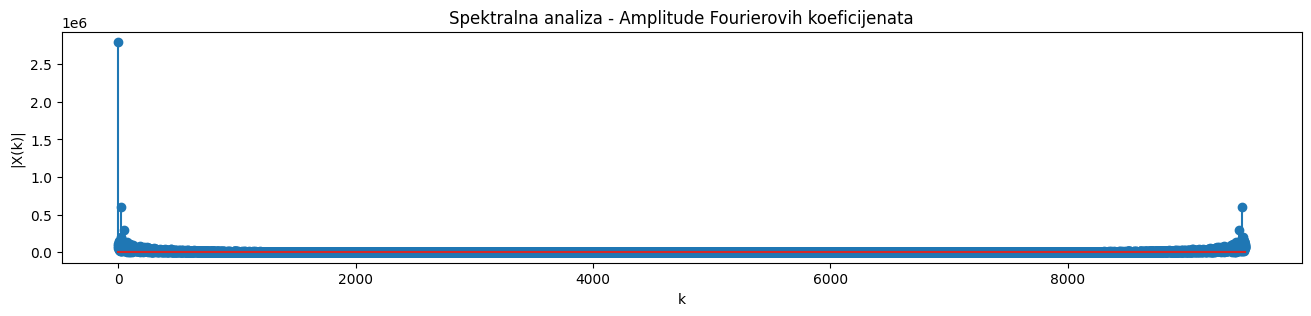

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
values_fft = fft(values, n.size)
print(values_fft) # dobivene vrijednosti Fourierovih koeficijenata

plt.figure(figsize=(16, 3))
plt.stem(np.abs(values_fft))
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title('Spektralna analiza - Amplitude Fourierovih koeficijenata')

plt.show()

**6.**	Izračunajte Fourierovu transformaciju na vremenskom otvoru zadanog vodostaja koristeći pravokutni otvor širine 2 godine. Prikažite rezultat pomoću pcolormesh. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

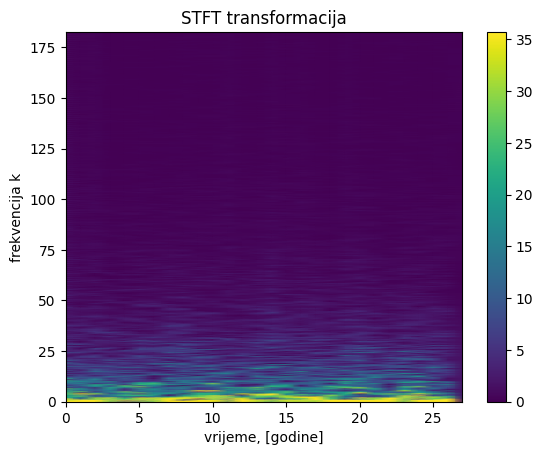

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
T = 365 # broj dana u godini - broj uzoraka signala
fs = 365 # frekvencija ocitavanja signala
window = 'boxcar' # otvor koji ce se koristiti (boxcar - pravokutni otvor)
f, t, Zxx = signal.stft(values, fs, window, nperseg = 2*T) # STFT, nperseg = duljina otvora
# izlazi: f = niz ocitanih frekvencija, t = niz vremena, Zxx = STFT od x
plt.pcolormesh(t, f, np.abs(Zxx), vmin = 0, vmax = np.abs(Zxx.max()) / 10, shading = 'gouraud')
# 2D slika apsolutnih vrijednosti Zxx, na x osi je vrijeme t, na y osi su frekvencije f
# abs(Zxx) je prikazana bojama, vmin i vmax odreduju raspon boja
# shading = nacin bojanja s interpolacijom
plt.colorbar() # raspon boja i veza s abs(Zxx)
plt.title('STFT transformacija')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.show()

ODGOVOR: Frekvencije koje se pojavljuju i koje su najintenzivnije vidljive obuhvaćaju raspon do k = 5. Također su primjetni svjetloplavi šiljci na nekim godinama, iako ih je teško identificirati, osobito u rasponu k od 5 do 15.
Frekvencije koje su dobro vidljive obuhvaćaju trajanje od otprilike pola godine do godinu dana. Najintenzivnije frekvencije mogu prikazati razdoblje od 2-3 godine.
Istaknute godine obuhvaćaju razdoblja od 1982. do 1985., 1989. do 1992., 1993. do 1994., 2000. do 2005. i 2007. godine.

**7.**	Upotrijebite drugu širinu otvora (po izboru) i ponovite prethodni zadatak. Ispišite koju širinu ste upotrijebili. Objasnite razlike u dobivenim slikama.

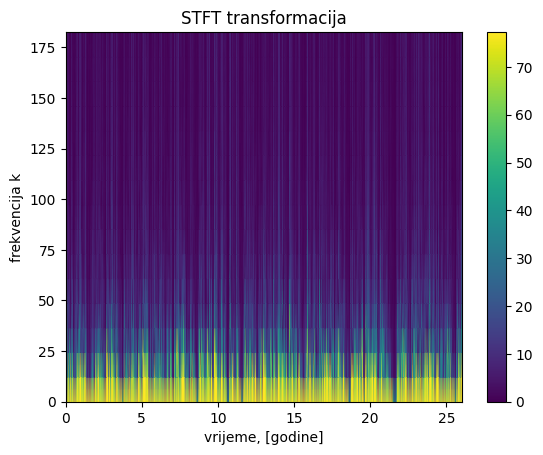

Upotrijebljena je širina: 30


In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
# Ovo je mjesto na kojem možete izvoditi svoj kod.
prozor = 30 # broj dana u godini - broj uzoraka signala
fs = 365 # frekvencija ocitavanja signala
window = 'boxcar' # otvor koji ce se koristiti (boxcar - pravokutni otvor)
f, t, Zxx = signal.stft(values, fs, window, nperseg = prozor) # STFT, nperseg = duljina otvora
# izlazi: f = niz ocitanih frekvencija, t = niz vremena, Zxx = STFT od x
plt.pcolormesh(t, f, np.abs(Zxx), vmin = 0, vmax = np.abs(Zxx.max()) / 10, shading = 'gouraud')
# 2D slika apsolutnih vrijednosti Zxx, na x osi je vrijeme t, na y osi su frekvencije f
# abs(Zxx) je prikazana bojama, vmin i vmax odreduju raspon boja
# shading = nacin bojanja s interpolacijom
plt.colorbar() # raspon boja i veza s abs(Zxx)
plt.title('STFT transformacija')
plt.ylabel('frekvencija k')
plt.xlabel('vrijeme, [godine]')
plt.show()
print(f'Upotrijebljena je širina: {prozor}')

ODGOVOR: Razlika u širini prozora utječe na frekvencijsku i vremensku rezoluciju grafa STFT transformacije. Širi prozor bolje pokazuje niskofrekventne i dugoročne promjene, a uži prozor daje bolju rezoluciju za visokofrekventne promjene i kratkotrajna događanja. U ovom zadatku smo mogli bolje raspoznati kratkotrajne promjene vodostaja i visoke frekvencije zbog tankih crtica odnosno amplituda.



**8.**	Ispišite sve obitelji kontinuiranih valića koje se nalaze u PyWavelets biblioteci. Na istoj slici, koristeći subplot naredbu, nacrtajte dvije valićne funkcije po izboru. U naslovu svake slike napišite o kojim valićima se radi.

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


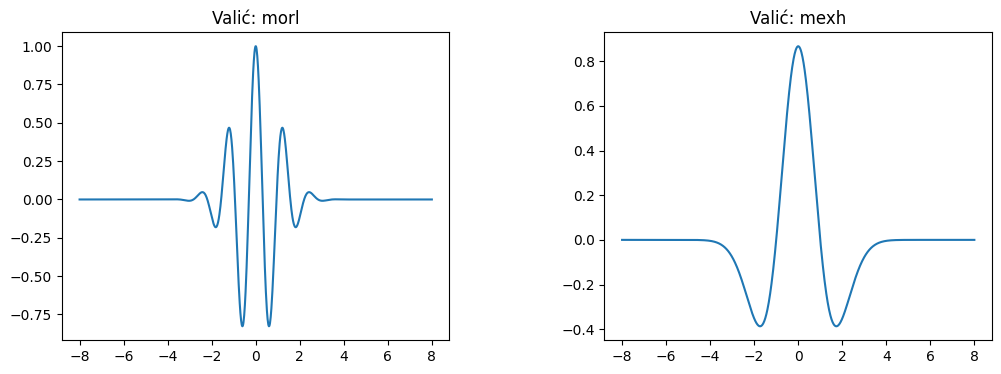

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.

# Ispisivanje svih obitelji kontinuiranih valića
print(pywt.wavelist(kind='continuous'))

# Odabir dviju valićnih funkcija
valic1 = 'morl'
valic2 = 'mexh'

# Kreiranje objekata valića
w1 = pywt.ContinuousWavelet(valic1)
w2 = pywt.ContinuousWavelet(valic2)

# Vrijednosti valićnih funkcija psi
psi1, t1 = w1.wavefun(level=10)
psi2, t2 = w2.wavefun(level=10)

# Crtanje valićnih funkcija
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t1, psi1)
plt.title(f'Valić: {valic1}')

plt.subplot(1, 2, 2)
plt.plot(t2, psi2)
plt.title(f'Valić: {valic2}')

plt.subplots_adjust(wspace=0.4)  # Povećanje razmaka između podgrafova
plt.show()


**9.**	Koristeći Morlet valić, odredite kontinuiranu valićnu transformaciju zadanog vodostaja. Nacrtajte apsolutnu vrijednost dobivenih koeficijenata. Odgovorite: koje frekvencije su vidljive u vodostaju? Koje godine se javljaju?

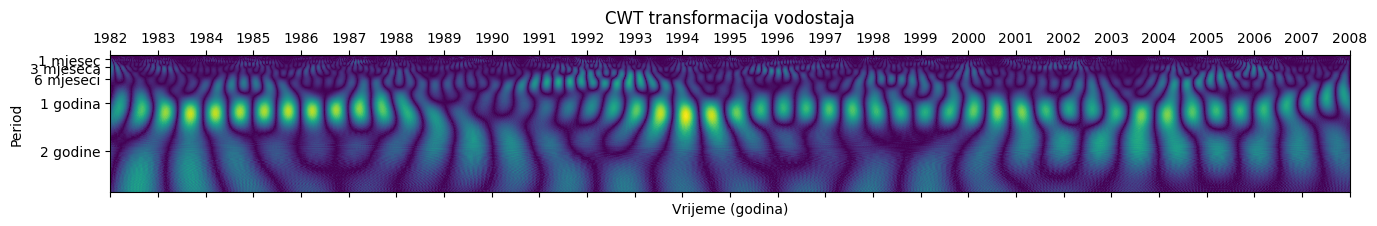

In [ ]:
# Ovo je mjesto na kojem možete izvoditi svoj kod.
valic = 'morl'

w = pywt.ContinuousWavelet(valic) # kreiranje objekta w koji sadrzi sve o valicu morl

psi, t = w.wavefun(level=10) # vrijednosti valicne funkcije psi

# generiranje liste sa zanimljivim skalama
step = 0.7
skala = np.arange(0.1, 2*T, step)

# racunanje CWT signala values, uz skalu 'skala' i izabrani valic
coef, freqs = pywt.cwt(values, skala, valic)

plt.matshow(abs(coef)) # coef je matrica vrijednosti cwt
plt.yticks([T//12, T//4, T//2, T, 2*T],['1 mjesec', '3 mjeseca', '6 mjeseci', '1 godina', '2 godine']) # oznaka na y osi
plt.xticks(np.arange(0, n.size,365), np.arange(1982, 2009, 1))
plt.title('CWT transformacija vodostaja')
plt.xlabel('Vrijeme (godina)')
plt.ylabel('Period')

plt.show()

ODGOVOR:
Frekvencije koje su vidljive u vodostaju mogu se odrediti na osnovu intenziteta šara na grafu CWT-a. Jače šare ukazuju na prisutnost izraženih frekvencija. Najizraženije i najintenzivnije frekvencije su one s periodom od 1 godine, dok su frekvencije s periodom od 2 godine vidljive, iako manje intenzivno. Frekvencije s periodom od 6 mjeseci također pokazuju intenzitet u određenim godinama, ali su teže uočljive zbog svoje manje amplitude. Nasuprot tome, frekvencije s periodima od 1 mjeseca i 3 mjeseca su suptilne i imaju nizak intenzitet, što ih čini izazovnima za analizu.

Godine kada su određene frekvencije izražene mogu odrediti iz grafa. U frekvencijama od 1 godine primjećuje se prisutnost u godinama od 1982. do 1988., a potom od 1993. do 2008., pri čemu je intenzitet najizraženiji od 1993. do 1995. godine. Frekvencije s periodom od 6 mjeseci najizraženije su u razdoblju od 1992. do 1993. godine, dok je njihov intenzitet u drugim godinama manji. Frekvencije s periodom od 2 godine prisutne su svake godine od 1982. do 2008., iako su manje intenzivne.

**10.**	Odgovorite: objasnite razliku u dobivenim rezultatima STFT i CWT.


ODGOVOR: STFT i CWT su dvije različite metode za analizu signala u vremenskoj i frekvencijskoj domeni.
STFT je diskretna transformacija koja signal dijeli na male segmente i primjenjuje Fourierovu transformaciju na te segmente. CWT je kontinuirana transformacija koja koristi kontinuirani valić tj. wavelet koji varira u skali i poziciji.
STFT ima fiksnu vremensku i frekvencijsku rezoluciju koja ovisi o veličini prozora, dok je frekvencijska rezolucija obrnuto proporcionalna veličini prozora. CWT omogućuje promjenu skale valića što rezultira boljom vremenskom i frekvencijskom rezolucijom.
Kod STFT je teško razlikovati različite frekvencijske komponente koje se pojavljuju u različitim vremenskim intervalima, a CWT omogućuje bolju detekciju u tom smislu.
STFT transformacija se izvodi puno brže nego CWT transformacija.